# Testing trained model for traffic light detection

The notebook tests the model trained on a traffic data from Udacity simulator and real world data on the test track. The training of the actual model was done using Tensorflow's detection pipeline available [here](https://github.com/tensorflow/models/tree/master/research/object_detection)

In [32]:
import numpy as np
import os
import sys
import tensorflow as tf
import glob

from matplotlib import pyplot as plt
from PIL import Image

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Append utils from tensorflow rep to the path

sys.path.append("./models/research/object_detection")
#sys.path.append("./models/research/slim")


In [12]:
from utils import label_map_util
from utils import visualization_utils as vis_util

## Configuration Options

In [38]:
# Total number of classes
NUM_CLASSES = 4

# Map of numeric labels to their names.
LABLE_MAP_FILE = './data/labels.pbtxt'

# Trained Model
TRAINED_MODEL = './data/frozen_models/frozen_inference_graph.pb'

# Test images
TEST_IMAGES_DIR = './data/sim_test_data/'


## Load Label Maps


In [39]:

label_map = label_map_util.load_labelmap(LABLE_MAP_FILE)
print(label_map)


item {
  name: "Green"
  id: 1
}
item {
  name: "Red"
  id: 2
}
item {
  name: "Yellow"
  id: 3
}
item {
  name: "off"
  id: 4
}



In [41]:
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes = NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [42]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


### Load Trained Model

In [45]:
model_file = './data'
detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(TRAINED_MODEL, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


## Detection

(2, 0.99457824)
(2, 3.4114375e-05)
(3, 0.9987908)
(2, 3.3833618e-05)
(2, 6.0348382e-05)
(2, 0.99805814)
(3, 0.99871671)
(2, 0.99531156)


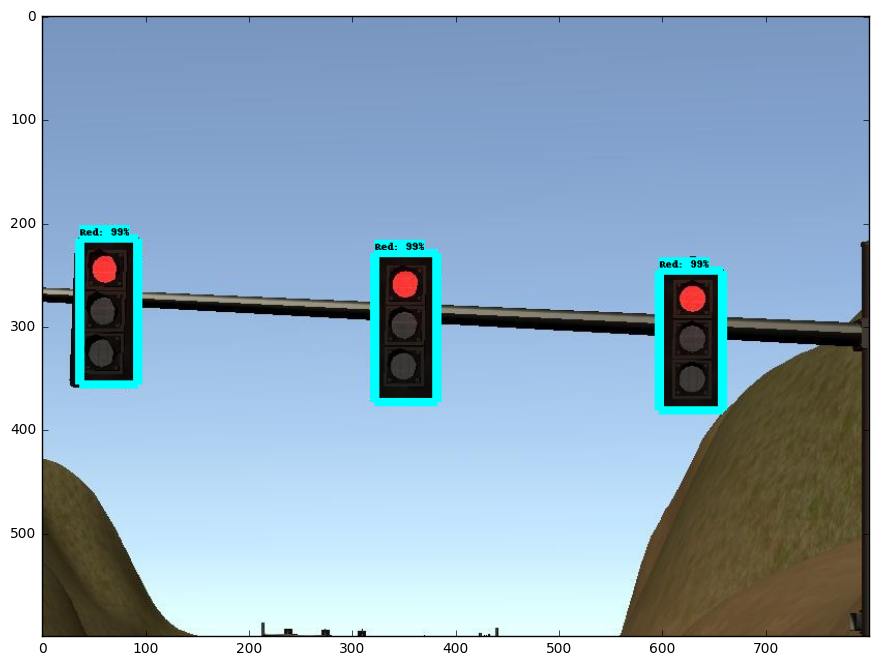

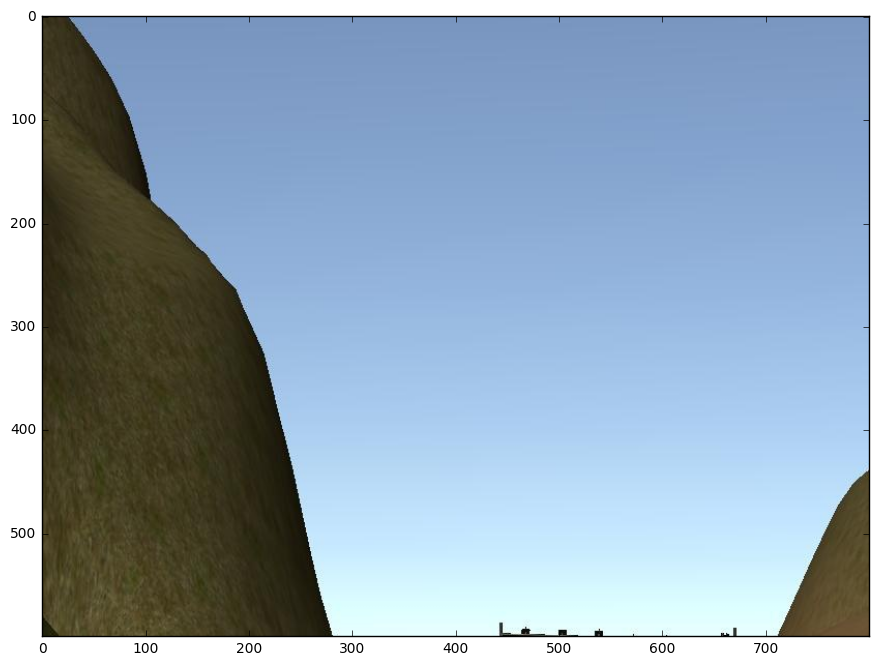

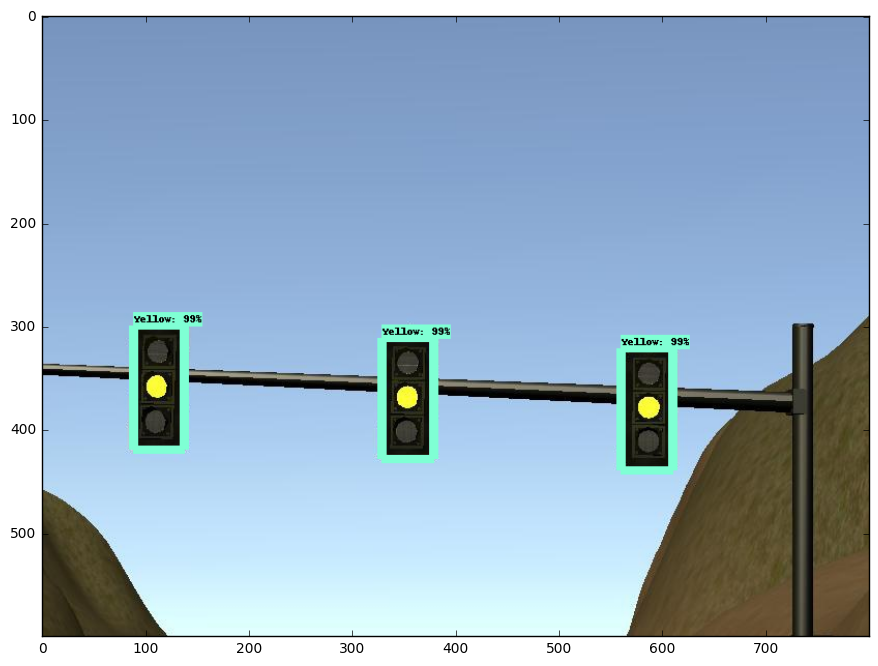

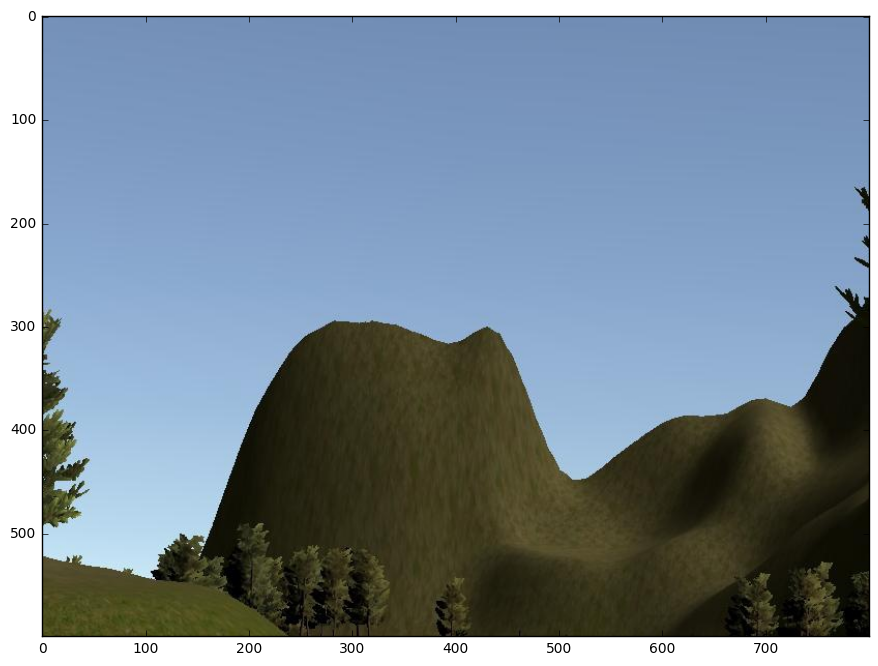

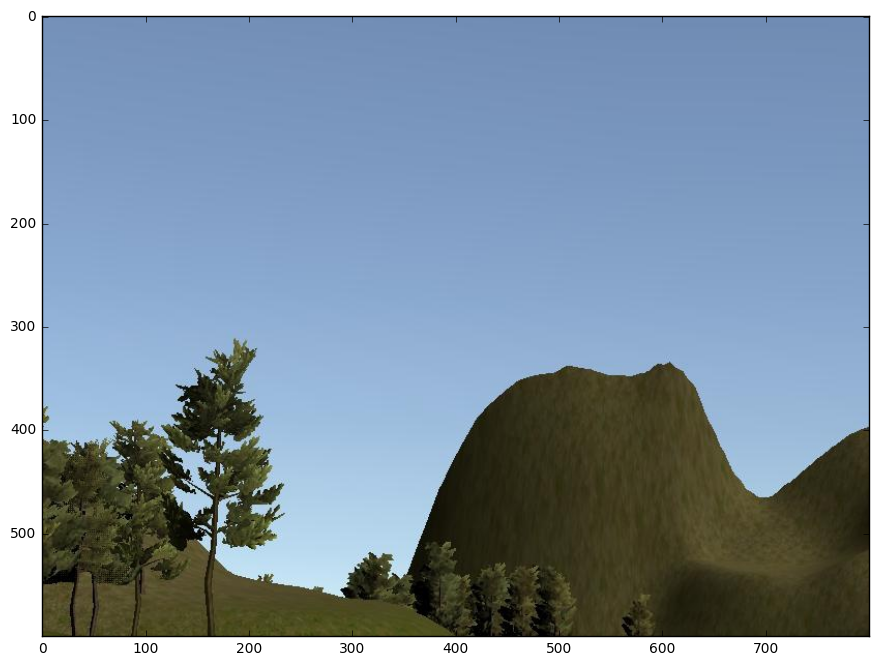

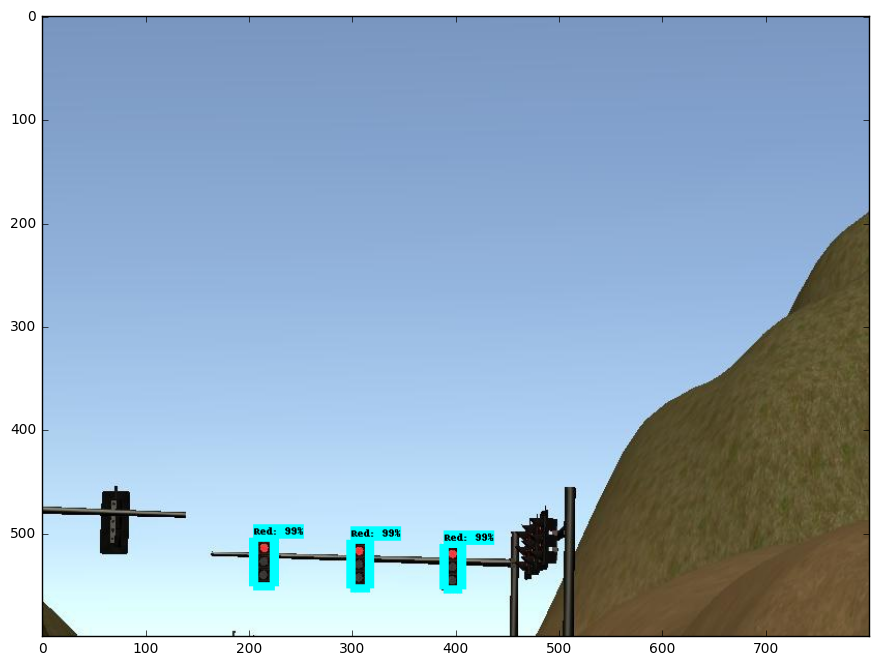

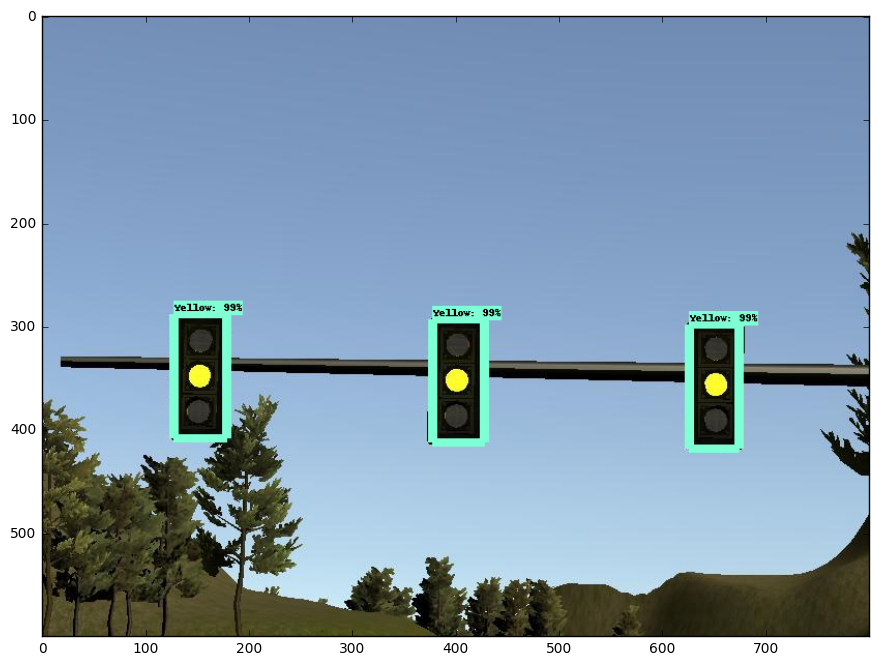

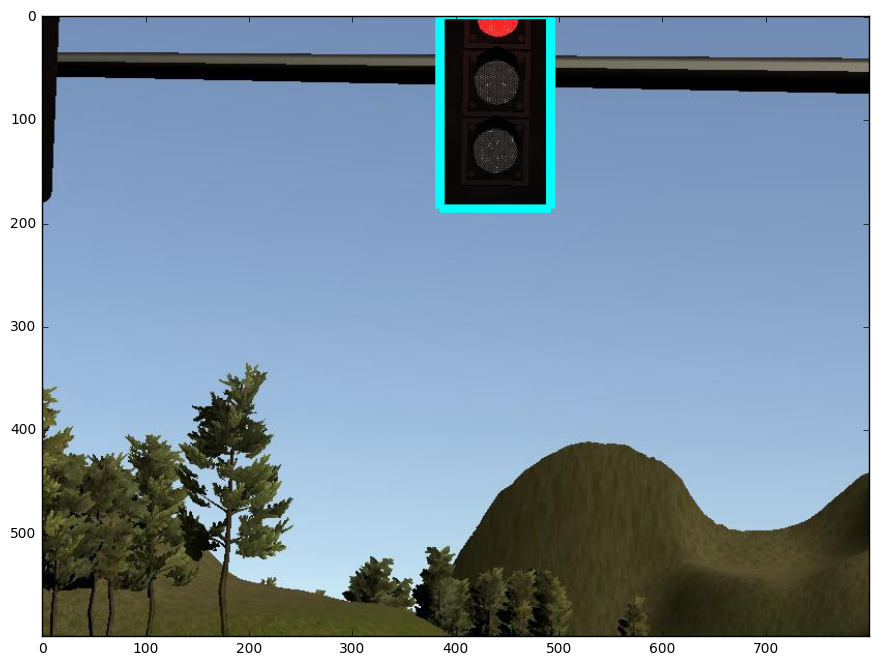

In [58]:
test_images = glob.glob("%s/*.jpg"%TEST_IMAGES_DIR)

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in test_images:
            image = Image.open(image_path)
            # the array based representation of the image will be used later in order to prepare the
            # result image with boxes and labels on it.
            image_np = load_image_into_numpy_array(image)
            # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
            image_np_expanded = np.expand_dims(image_np, axis=0)
            # Actual detection.
            (boxes, scores, classes, num) = sess.run(
                      [detection_boxes, detection_scores, detection_classes, num_detections],
                          feed_dict={image_tensor: image_np_expanded})
                          
            # Visualization of the results of a detection.
            vis_util.visualize_boxes_and_labels_on_image_array(
                                  image_np,
                                  np.squeeze(boxes),
                                  np.squeeze(classes).astype(np.int32),
                                  np.squeeze(scores), 
                                  category_index,
                                  use_normalized_coordinates=True,
                                line_thickness=8)
            plt.figure(figsize=(12, 8))
            plt.imshow(image_np)
